In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
from run_cdimf import run_cdimf_experiment
args = {
    'domains': "sport_cloth",
    'task': 'warm-start',
    'model': 'CDIMF',
    'num_epoch': 12,
    'prox': 'L2',
    'reg_z': 0,
    'reg_als': 0.03,
    'unobserved_weight': 0.3,
    'rho': 0,
    'v': 0.5,
    'rank': 192,
    'seed': 15,
    'evaluate_every': 1,
    'aggregate_every': 1,
    'verbose': 0
}

## The effect of sharing parameter $\rho$ 

In [5]:
metrics_vs_rho = dict()

In [6]:
for rho in [0, 5, 10, 20, 30]:
    args['rho'] = rho
    metrics = run_cdimf_experiment(args)
    metrics_vs_rho[rho] = metrics

domain1 users: 9928 domain2 users: 9928 shared users: 9928
generate test samples ...


7540it [00:03, 2083.83it/s]
8326it [00:03, 2754.33it/s]


{'task': 'warm-start', 'model': 'CDIMF', 'domains': 'cloth_sport', 'rank': 192, 'std': 0.1, 'implicit': True, 'reg_als': 0.03, 'unobserved_weight': 0.3, 'v': 0.5, 'reg_z': 0, 'rho': 0, 'prox': 'L2', 'num_epoch': 12, 'seed': 15, 'evaluate_every': 1, 'aggregate_every': 1, 'verbose': 0}
domain1 users: 9928 domain2 users: 9928 shared users: 9928
generate test samples ...


7540it [00:03, 2279.69it/s]
8326it [00:02, 2914.80it/s]


{'task': 'warm-start', 'model': 'CDIMF', 'domains': 'cloth_sport', 'rank': 192, 'std': 0.1, 'implicit': True, 'reg_als': 0.03, 'unobserved_weight': 0.3, 'v': 0.5, 'reg_z': 0, 'rho': 5, 'prox': 'L2', 'num_epoch': 12, 'seed': 15, 'evaluate_every': 1, 'aggregate_every': 1, 'verbose': 0}
domain1 users: 9928 domain2 users: 9928 shared users: 9928
generate test samples ...


7540it [00:03, 2162.74it/s]
8326it [00:02, 2878.57it/s]


{'task': 'warm-start', 'model': 'CDIMF', 'domains': 'cloth_sport', 'rank': 192, 'std': 0.1, 'implicit': True, 'reg_als': 0.03, 'unobserved_weight': 0.3, 'v': 0.5, 'reg_z': 0, 'rho': 10, 'prox': 'L2', 'num_epoch': 12, 'seed': 15, 'evaluate_every': 1, 'aggregate_every': 1, 'verbose': 0}
domain1 users: 9928 domain2 users: 9928 shared users: 9928
generate test samples ...


7540it [00:03, 2211.82it/s]
8326it [00:02, 2871.06it/s]


{'task': 'warm-start', 'model': 'CDIMF', 'domains': 'cloth_sport', 'rank': 192, 'std': 0.1, 'implicit': True, 'reg_als': 0.03, 'unobserved_weight': 0.3, 'v': 0.5, 'reg_z': 0, 'rho': 20, 'prox': 'L2', 'num_epoch': 12, 'seed': 15, 'evaluate_every': 1, 'aggregate_every': 1, 'verbose': 0}
domain1 users: 9928 domain2 users: 9928 shared users: 9928
generate test samples ...


7540it [00:03, 2130.01it/s]
8326it [00:03, 2771.22it/s]


{'task': 'warm-start', 'model': 'CDIMF', 'domains': 'cloth_sport', 'rank': 192, 'std': 0.1, 'implicit': True, 'reg_als': 0.03, 'unobserved_weight': 0.3, 'v': 0.5, 'reg_z': 0, 'rho': 30, 'prox': 'L2', 'num_epoch': 12, 'seed': 15, 'evaluate_every': 1, 'aggregate_every': 1, 'verbose': 0}


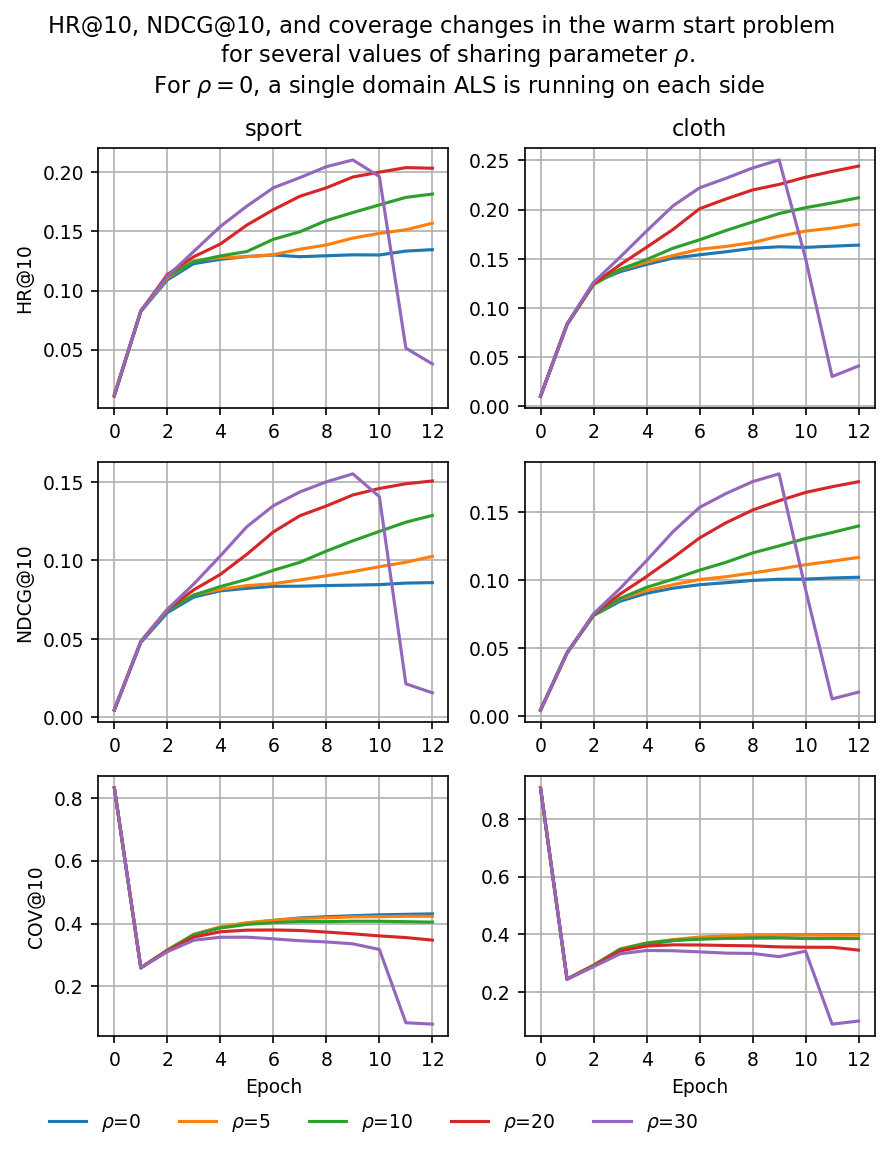

In [14]:
N1, N2 = args['domains'].split('_')
metrics_names = ['HR@10', 'NDCG@10', 'COV@10']
plt.rc('font', size=9)   

fig, ax = plt.subplots(len(metrics_names), 2, figsize=(6, 2.5*len(metrics_names)), dpi=150)
fig.suptitle(
    r'''Metrics changes for several values of sharing parameter $\rho$. 
    For $\rho=0$, a single domain ALS is running on each side''')

lines = []
labels = []
k = 0
for p, metrics in metrics_vs_rho.items():
    for j, mm in enumerate(metrics_names):
        ax[j, 0].set_ylabel(mm)
        for i, m in enumerate(metrics):
            ax[j, i].plot(m['epochs'], m[mm], label=fr'$AP$={p:.0f}')
            ax[j, i].set_xticks(np.arange(0, m['epochs'][-1]+1, 2))
            ax[j, i].grid('on')
    lines.append(ax[0,0].lines[k])
    k += 1
    labels.append(fr'$\rho$={p:.0f}')

for i, d in enumerate([N1, N2]):
    ax[0, i].set_title(d)
    ax[-1,i].set_xlabel('Epoch')

# Add the legend to the figure
leg = fig.legend(lines, labels, ncol=len(labels), bbox_to_anchor=(0.8, 0.02))
leg.get_frame().set_linewidth(0.0)
plt.tight_layout();

## The effect of proximal operator L2

In [15]:
metrics_vs_reg_z = dict()
args['rho'] = 20
args['evaluate_every'] = 12 # for saving time

In [16]:
for r in np.logspace(-3,2,11):
    args['reg_z'] = r
    metrics = run_cdimf_experiment(args)
    metrics_vs_reg_z[r] = metrics

domain1 users: 9928 domain2 users: 9928 shared users: 9928
generate test samples ...


8326it [00:03, 2686.82it/s]
7540it [00:03, 2057.85it/s]


{'task': 'warm-start', 'model': 'CDIMF', 'domains': 'cloth_sport', 'rank': 192, 'std': 0.1, 'implicit': True, 'reg_als': 0.03, 'unobserved_weight': 0.3, 'v': 0.5, 'reg_z': 0.001, 'rho': 20, 'prox': 'L2', 'num_epoch': 12, 'seed': 15, 'evaluate_every': 12, 'aggregate_every': 1, 'verbose': 0}
domain1 users: 9928 domain2 users: 9928 shared users: 9928
generate test samples ...


7540it [00:03, 2241.13it/s]
8326it [00:02, 2944.04it/s]


{'task': 'warm-start', 'model': 'CDIMF', 'domains': 'cloth_sport', 'rank': 192, 'std': 0.1, 'implicit': True, 'reg_als': 0.03, 'unobserved_weight': 0.3, 'v': 0.5, 'reg_z': 0.0031622776601683794, 'rho': 20, 'prox': 'L2', 'num_epoch': 12, 'seed': 15, 'evaluate_every': 12, 'aggregate_every': 1, 'verbose': 0}
domain1 users: 9928 domain2 users: 9928 shared users: 9928
generate test samples ...


7540it [00:03, 2268.08it/s]
8326it [00:02, 2972.44it/s]


{'task': 'warm-start', 'model': 'CDIMF', 'domains': 'cloth_sport', 'rank': 192, 'std': 0.1, 'implicit': True, 'reg_als': 0.03, 'unobserved_weight': 0.3, 'v': 0.5, 'reg_z': 0.01, 'rho': 20, 'prox': 'L2', 'num_epoch': 12, 'seed': 15, 'evaluate_every': 12, 'aggregate_every': 1, 'verbose': 0}
domain1 users: 9928 domain2 users: 9928 shared users: 9928
generate test samples ...


7540it [00:03, 2288.98it/s]
8326it [00:02, 2992.15it/s]


{'task': 'warm-start', 'model': 'CDIMF', 'domains': 'cloth_sport', 'rank': 192, 'std': 0.1, 'implicit': True, 'reg_als': 0.03, 'unobserved_weight': 0.3, 'v': 0.5, 'reg_z': 0.03162277660168379, 'rho': 20, 'prox': 'L2', 'num_epoch': 12, 'seed': 15, 'evaluate_every': 12, 'aggregate_every': 1, 'verbose': 0}
domain1 users: 9928 domain2 users: 9928 shared users: 9928
generate test samples ...


7540it [00:03, 2223.40it/s]
8326it [00:02, 2954.66it/s]


{'task': 'warm-start', 'model': 'CDIMF', 'domains': 'cloth_sport', 'rank': 192, 'std': 0.1, 'implicit': True, 'reg_als': 0.03, 'unobserved_weight': 0.3, 'v': 0.5, 'reg_z': 0.09999999999999999, 'rho': 20, 'prox': 'L2', 'num_epoch': 12, 'seed': 15, 'evaluate_every': 12, 'aggregate_every': 1, 'verbose': 0}
domain1 users: 9928 domain2 users: 9928 shared users: 9928
generate test samples ...


7540it [00:03, 2239.50it/s]
8326it [00:02, 2929.80it/s]


{'task': 'warm-start', 'model': 'CDIMF', 'domains': 'cloth_sport', 'rank': 192, 'std': 0.1, 'implicit': True, 'reg_als': 0.03, 'unobserved_weight': 0.3, 'v': 0.5, 'reg_z': 0.31622776601683794, 'rho': 20, 'prox': 'L2', 'num_epoch': 12, 'seed': 15, 'evaluate_every': 12, 'aggregate_every': 1, 'verbose': 0}
domain1 users: 9928 domain2 users: 9928 shared users: 9928
generate test samples ...


7540it [00:03, 2259.09it/s]
8326it [00:02, 2991.98it/s]


{'task': 'warm-start', 'model': 'CDIMF', 'domains': 'cloth_sport', 'rank': 192, 'std': 0.1, 'implicit': True, 'reg_als': 0.03, 'unobserved_weight': 0.3, 'v': 0.5, 'reg_z': 1.0, 'rho': 20, 'prox': 'L2', 'num_epoch': 12, 'seed': 15, 'evaluate_every': 12, 'aggregate_every': 1, 'verbose': 0}
domain1 users: 9928 domain2 users: 9928 shared users: 9928
generate test samples ...


7540it [00:03, 2270.49it/s]
8326it [00:02, 2937.92it/s]


{'task': 'warm-start', 'model': 'CDIMF', 'domains': 'cloth_sport', 'rank': 192, 'std': 0.1, 'implicit': True, 'reg_als': 0.03, 'unobserved_weight': 0.3, 'v': 0.5, 'reg_z': 3.162277660168379, 'rho': 20, 'prox': 'L2', 'num_epoch': 12, 'seed': 15, 'evaluate_every': 12, 'aggregate_every': 1, 'verbose': 0}
domain1 users: 9928 domain2 users: 9928 shared users: 9928
generate test samples ...


7540it [00:03, 2182.50it/s]
8326it [00:02, 2884.84it/s]


{'task': 'warm-start', 'model': 'CDIMF', 'domains': 'cloth_sport', 'rank': 192, 'std': 0.1, 'implicit': True, 'reg_als': 0.03, 'unobserved_weight': 0.3, 'v': 0.5, 'reg_z': 10.0, 'rho': 20, 'prox': 'L2', 'num_epoch': 12, 'seed': 15, 'evaluate_every': 12, 'aggregate_every': 1, 'verbose': 0}
domain1 users: 9928 domain2 users: 9928 shared users: 9928
generate test samples ...


7540it [00:03, 2243.45it/s]
8326it [00:02, 2923.90it/s]


{'task': 'warm-start', 'model': 'CDIMF', 'domains': 'cloth_sport', 'rank': 192, 'std': 0.1, 'implicit': True, 'reg_als': 0.03, 'unobserved_weight': 0.3, 'v': 0.5, 'reg_z': 31.622776601683796, 'rho': 20, 'prox': 'L2', 'num_epoch': 12, 'seed': 15, 'evaluate_every': 12, 'aggregate_every': 1, 'verbose': 0}
domain1 users: 9928 domain2 users: 9928 shared users: 9928
generate test samples ...


7540it [00:03, 2245.02it/s]
8326it [00:02, 2961.14it/s]


{'task': 'warm-start', 'model': 'CDIMF', 'domains': 'cloth_sport', 'rank': 192, 'std': 0.1, 'implicit': True, 'reg_als': 0.03, 'unobserved_weight': 0.3, 'v': 0.5, 'reg_z': 100.0, 'rho': 20, 'prox': 'L2', 'num_epoch': 12, 'seed': 15, 'evaluate_every': 12, 'aggregate_every': 1, 'verbose': 0}


In [17]:
reg_z = []
hr = [[], []]
ndcg = [[], []]
for rz, metrics in metrics_vs_reg_z.items():
    reg_z.append(rz)
    for i, metric in enumerate(metrics):
        hr[i].append(metric['HR@10'][-1])
        ndcg[i].append(metric['NDCG@10'][-1])

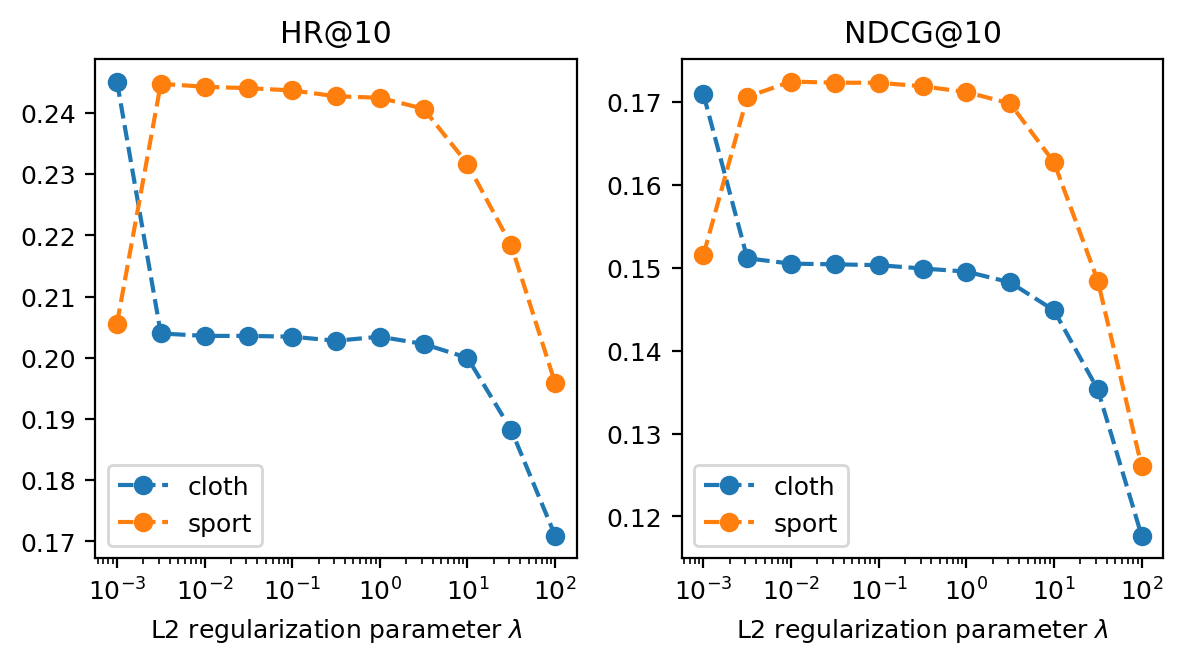

In [18]:
labels = args['domains'].split('_') 
plt.rc('font', size=9)   
fig, axs = plt.subplots(1, 2, figsize=(6, 3), dpi=200)
for j, m in enumerate([hr, ndcg]):
    for i in range(2):
        axs[j].plot(reg_z, m[i], '--o', label=labels[i])
        axs[j].set_xscale('log')
    axs[j].legend()
    axs[j].grid('on')
fig.tight_layout()
axs[1].set_xlabel(r'L2 regularization parameter $\lambda$')
axs[0].set_xlabel(r'L2 regularization parameter $\lambda$')
axs[0].set_title('HR@10')
axs[1].set_title('NDCG@10');

## The effect of aggregation period

In [19]:
metrics_vs_agg = dict()
args['rho'] = 20
args['evaluate_every'] = 1
args['reg_z'] = 0

In [20]:
for ap in [1, 2, 3, 4]:
    args['aggregate_every'] = ap
    metrics = run_cdimf_experiment(args)
    metrics_vs_agg[ap] = metrics

domain1 users: 9928 domain2 users: 9928 shared users: 9928
generate test samples ...


7540it [00:03, 2066.21it/s]
8326it [00:02, 2776.62it/s]


{'task': 'warm-start', 'model': 'CDIMF', 'domains': 'cloth_sport', 'rank': 192, 'std': 0.1, 'implicit': True, 'reg_als': 0.03, 'unobserved_weight': 0.3, 'v': 0.5, 'reg_z': 0, 'rho': 20, 'prox': 'L2', 'num_epoch': 12, 'seed': 15, 'evaluate_every': 1, 'aggregate_every': 1, 'verbose': 0}
domain1 users: 9928 domain2 users: 9928 shared users: 9928
generate test samples ...


7540it [00:03, 2191.34it/s]
8326it [00:02, 2912.10it/s]


{'task': 'warm-start', 'model': 'CDIMF', 'domains': 'cloth_sport', 'rank': 192, 'std': 0.1, 'implicit': True, 'reg_als': 0.03, 'unobserved_weight': 0.3, 'v': 0.5, 'reg_z': 0, 'rho': 20, 'prox': 'L2', 'num_epoch': 12, 'seed': 15, 'evaluate_every': 1, 'aggregate_every': 2, 'verbose': 0}
domain1 users: 9928 domain2 users: 9928 shared users: 9928
generate test samples ...


7540it [00:03, 2237.30it/s]
8326it [00:02, 2907.65it/s]


{'task': 'warm-start', 'model': 'CDIMF', 'domains': 'cloth_sport', 'rank': 192, 'std': 0.1, 'implicit': True, 'reg_als': 0.03, 'unobserved_weight': 0.3, 'v': 0.5, 'reg_z': 0, 'rho': 20, 'prox': 'L2', 'num_epoch': 12, 'seed': 15, 'evaluate_every': 1, 'aggregate_every': 3, 'verbose': 0}
domain1 users: 9928 domain2 users: 9928 shared users: 9928
generate test samples ...


7540it [00:03, 2317.36it/s]
8326it [00:02, 3088.44it/s]


{'task': 'warm-start', 'model': 'CDIMF', 'domains': 'cloth_sport', 'rank': 192, 'std': 0.1, 'implicit': True, 'reg_als': 0.03, 'unobserved_weight': 0.3, 'v': 0.5, 'reg_z': 0, 'rho': 20, 'prox': 'L2', 'num_epoch': 12, 'seed': 15, 'evaluate_every': 1, 'aggregate_every': 4, 'verbose': 0}


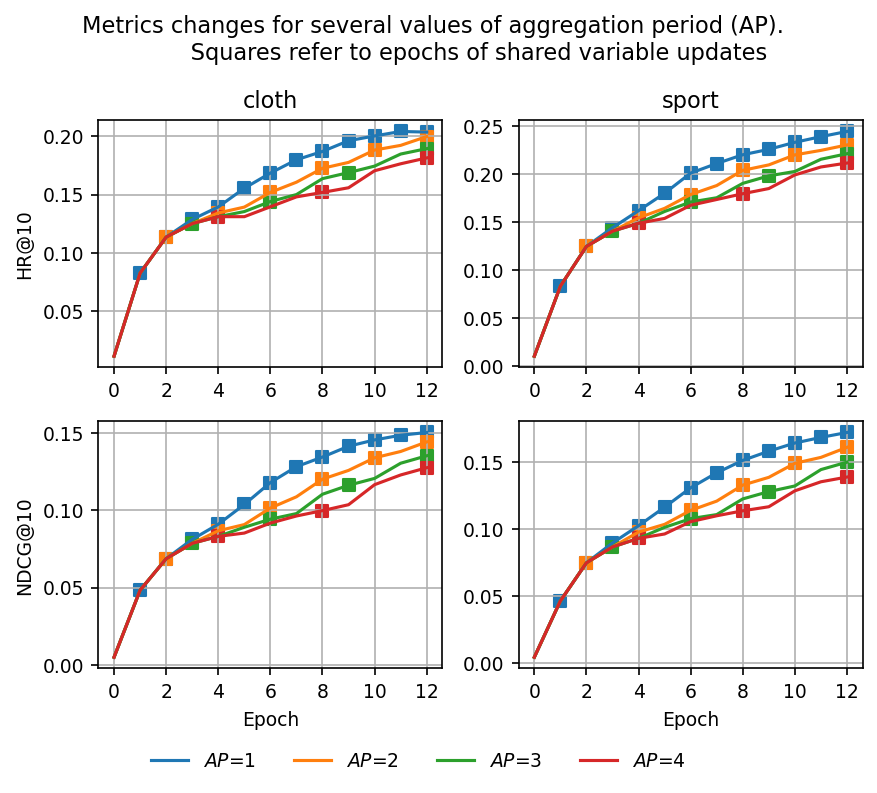

In [26]:
N1, N2 = args['domains'].split('_')
metrics_names = ['HR@10', 'NDCG@10']
plt.rc('font', size=9)   

fig, ax = plt.subplots(len(metrics_names), 2, figsize=(6, 2.5*len(metrics_names)), dpi=150)
fig.suptitle(r'''Metrics changes for several values of aggregation period (AP).
             Squares refer to epochs of shared variable updates''')

lines = []
labels = []
k = 0
for p, metrics in metrics_vs_agg.items():
    for j, mm in enumerate(metrics_names):
        ax[j, 0].set_ylabel(mm)
        for i, m in enumerate(metrics):
            ax[j, i].plot(m['epochs'], m[mm], label=fr'$AP$={p:.0f}')
            ax[j, i].scatter(m['epochs'][p::p], m[mm][p::p], marker='s',label=fr'$AP$={p}')
            ax[j, i].set_xticks(np.arange(0, m['epochs'][-1]+1, 2))
            ax[j, i].grid('on')
    lines.append(ax[0,0].lines[k])
    k += 1
    labels.append(fr'$AP$={p:.0f}')

for i, d in enumerate([N1, N2]):
    ax[0, i].set_title(d)
    ax[-1,i].set_xlabel('Epoch')

# Add the legend to the figure
leg = fig.legend(lines, labels, ncol=len(labels), bbox_to_anchor=(0.8, 0.02))
leg.get_frame().set_linewidth(0.0)
plt.tight_layout();